In [1]:
#import kniznic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [30]:
#nacitanie .csv suboru so vsetkymi datami
df = pd.read_csv('stats.csv', header=0)
#ulozenie poslednych 298 dat do premennej na testovanie
df_test = df.iloc[df.win.count()-298:df.win.count()]
#ulozenie prvych 700 dat do premenej na trenovanie
df_train = df.iloc[0:df.win.count()-298]
#zoradenie trenovacej premennej tak aby na zaciatku boli vyhry a aby sme to mohli lahko zobrazit v grafe
df_train = df_train.sort_values(by=['win'])

#trenovacie aj testovacie data rozdelime do X co su vsetky data na ktorych sa neuronka bude ucit (od 9 stlpca az po koniec)
#v jednom riadku tychto dat sa nachadzaju udaje o tom ako jeden hrac hral jednu hru... napriklad pocet zabiti a pocet smrti
#Y data hovoria o tom ci bola hra vyhrana (1) alebo ci bola hra prehrana (0) (prvy stlpec)
train_x=df_train.iloc[:,9:].values
train_y=df_train.iloc[:,1].values
test_x=df_test.iloc[:,9:].values
test_y=df_test.iloc[:,1].values


#df_train.count()

In [31]:
class AdalineGD(object):
    
    def __init__(self, rychlost_ucenia=0.00001,pocet_iteracii = 1000):
        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
    def fit(self,X,y):
        
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_=[]
        
        for i in range (self.pocet_iteracii):
            output = self.net_input(X)       
            errors = (y-output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
        plt.plot(self.cost_)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):
        return self.net_input(X)
    
    
    def predikcia(self,X):
        print(self.linearna_aktivacia(X))
        return np.where(self.linearna_aktivacia(X)>=0.5,1,0)

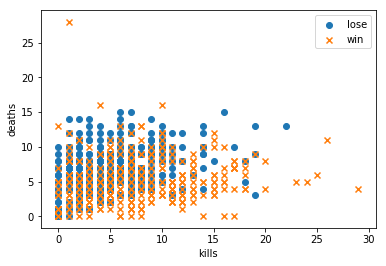

In [32]:
#zobrazenie dat v grafe (treba mysliet na to ze vela dat sa prekryvaju cez seba takze tento graf nema najlepsiu vypovednu hodnotu)
#zobrazili sme v stlpci pocet killov (zabiti) a pocet deaths (smrti) v jednej hre
#kedze podla predchadzajuceho prikazu vieme ze pocet prehier je 348 tak mozeme oznacit tieto data ako "lose" a zvysne data ako "win"
plt.scatter(train_x[0:348, 0], train_x[0:348, 1], marker='o', label='lose')
plt.scatter(train_x[348:700, 0], train_x[348:700, 1], marker='x', label='win')
plt.xlabel('kills')
plt.ylabel('deaths')
plt.legend()

In [33]:
#neskalovane data
#moj_adaline = AdalineGD()
#moj_adaline.fit(train_x,train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


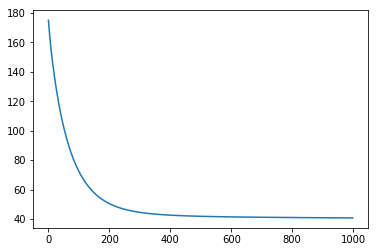

In [34]:
#skalovanie dat
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

#vytvorime triedy a pouzijeme data na trenovanie aby sme natrenovali neuronku
moj_adaline = AdalineGD()
moj_adaline.fit(train_x,train_y)

In [35]:
# vo vypise mozeme vydiet data ktore sa pouzivaju na predikciu (self.linearna_aktivacia) ktoru sme vypisali v def predikcia():
#v "test_y" mame ulozene ako v skutocnosti skonicla hra
#v "uspesnost" mame ulozene ako neuronka prediktovala vysledok
# tieto dve remenne porovname a tak dostaneme s akou uspesnostou nam neuronka prediktovala vysledok hry na zaklade vstupnych dat
uspesnost= moj_adaline.predikcia(test_x)
print(test_y)
print(uspesnost)
print('Presnosť siete je: ', accuracy_score(test_y, uspesnost)*100,"%")
#vieme povedat ze zo vstupnych dat su najdolezitejsie "kills "deaths" "assists" cize zabitia smrte a asistencie...
#pretoze ak sme pracovali iba s tymito troma stlpcami ako so vstupnymi datami tak sme dostali 75% uspesnost 
#a ked sme pridali vsetky ostatne data tak sme si prilepsili uz len na 81% uspesnost
#takto sme "naucili" neuronku predikovat ci jeden hrac vyhra alebo prehra hru na zaklade dat ktore hovoria o tom ako hral hru
#tiez sme dokazali ze to ako dobre hrate hru zalezi na tom ci hru vyhrate alebo nie(co je samozrejme logicke)
#kedze League of Legends je timova hra(5 proti 5) tak stale budu hraci ktory hrali zle(vela smrti a malo zabiti...) ale stale vyhraju hru,
#preto povazujem 81% za uspesne cislo

[ 1.07124230e-01  2.48219682e-01  7.94686637e-01  3.98666419e-01
  3.86384265e-01  1.46100107e+00  1.07691437e+00  2.20024861e-01
  7.77015187e-01  6.04639842e-01  4.12180429e-01  2.41826947e-01
 -2.67774259e-01  4.35912660e-01  5.12556184e-01  7.95709477e-01
  5.46797939e-01  8.32666096e-01  1.02726397e+00  3.72420972e-01
  6.99649787e-01  7.70956220e-01  9.70825857e-01  9.98823137e-01
  8.89322060e-01  5.49446767e-01  2.48301380e-01 -2.54434561e-02
 -7.61238677e-02  2.60614066e-01 -3.10418640e-03  1.76699636e-01
  1.50784962e-01 -6.45973202e-04  2.84512933e-02  1.35132084e+00
  6.14584078e-01  6.03220492e-01  6.86923865e-01  7.19554709e-01
  4.65156876e-01  5.80801469e-01  3.35044248e-01  5.69411891e-01
  8.70550088e-01  4.39321726e-01  3.69991597e-02  3.61567676e-01
  3.57499318e-01  1.79763908e-01  5.93883929e-01  1.13093864e-01
  4.06331585e-01  9.30097285e-01  2.62243708e-01  7.50330675e-02
  5.13825646e-01  4.15181915e-01  8.41721114e-01  1.91876340e-01
  6.22850039e-02  1.03159